In [34]:
import numpy as np
from Batchizer import Batchizer
# from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_batch = Batchizer('data/train/', 32, 'train')

In [ ]:
def draw_center(img, label):
    img = Image.open(img)
    img = np.array(img)
    x = int(np.float32(label[0]))
    y = int(np.float32(label[1]))
    print("{0}, {1}".format(x,y))
    img[y-2:y+2,x-2:x+2] = 255 
    imgplot = plt.imshow(img,  cmap='gray')

In [ ]:
batches = train_batch.batches()
for x, y in batches:
    img = x[1]
    img = np.squeeze(img)
    label = y[1]
    draw_center(img,label)
    break

In [11]:
from PIL import Image
from xml.etree import ElementTree

In [12]:
img_url = 'Original-data/supermarkt/2/100in.bmp'
xml_url = 'Original-data/supermarkt/2/100gt.xml'
e = ElementTree.parse(xml_url).getroot()
x = e[0].text
y = e[1].text
print(type(np.x))

<class 'str'>


In [ ]:
draw_center(img_url, label)

In [ ]:
img[y-2:y+2,x-2:x+2] = 255 
imgplot = plt.imshow(img,  cmap='gray')

In [1]:
import os
from random import shuffle
from PIL import Image
import numpy as np


class Batchizer(object):
    """
    list the images filename and read labels.csv,
    shuffle them at each epoch and yield `batch_size` of images
    """

    def __init__(self, root_path, batch_size, setname):
        self.batch_size = batch_size

        if not os.path.isdir(root_path):
            raise FileNotFoundError

        part_folders = [os.path.join(root_path, f)
                        for f in os.listdir(root_path)
                        if os.path.isdir(os.path.join(root_path, f))]

        self.images_fn = []
        for p in part_folders:
            self.images_fn.extend([os.path.join(p, f)
                                   for f in os.listdir(p)
                                   if f.endswith(".jpg")])

        # sort the list file name to match the labels
        self.images_fn = sorted(self.images_fn)

        labels_fn = setname+"_labels.csv"
        labels_path = os.path.join(root_path, labels_fn)

        if not os.path.isfile(labels_path):
            raise FileNotFoundError

        self.labels = []
        with open(labels_path, "r") as f:
            for line in f:
                #  values: [ line #, x, y, w, h , a]
                values = line.strip().split(",")
                self.labels.append([values[1],  # x
                                    values[2],  # y
                                    values[3],  # w
                                    values[4],  # h
                                    values[5]])  # a

        self.n_batches = len(self.images_fn)/self.batch_size
        img = Image.open(self.images_fn[555])
        img = np.array(img)
        label = self.labels[555]
        x = int(np.float32(label[0]))
        y = int(np.float32(label[1]))
        print("{0}, {1}".format(x,y))
        img[y-2:y+2,x-2:x+2] = 255 
        imgplot = plt.imshow(img,  cmap='gray')

    def __shuffler(self):
        data = list(zip(self.images_fn, self.labels))
        shuffle(data)
        self.images_fn, self.labels = zip(*data)

    def batches(self):
        # before each epoch, shuffle data
#         self.__shuffler()

        images = []
        labels = []
        for i, fn in enumerate(self.images_fn):
            image = Image.open(fn, 'r')
            # todo: add noise here
            label = self.labels[i]
            images.append(np.expand_dims(np.array(image), -1))
            labels.append(label)
            if len(images) == self.batch_size:
                yield images, labels
                images = []
                labels = []

        # just yield reminded data
        if len(images) > 0:
            yield images, labels

131, 69


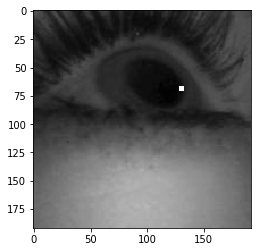

In [3]:
import matplotlib.pyplot as plt
bat = Batchizer('data/train/', 32, 'train')

In [4]:
import numpy as np

In [15]:
data_len = 407366
train_len = int(np.ceil(data_len * 0.75))
print(train_len)
valid_len = int(np.round(data_len * 0.2))
print(valid_len)
train_data = data[:train_len]
valid_data = data[train_len:train_len+valid_len]
test_data = data[train_len+valid_len:]

assert data_len == (len(train_data)+len(valid_data)+len(test_data))

305525
81473


NameError: name 'data' is not defined

In [21]:
a = np.random.randint(0,high=100, size=(4,5,4))
print(a[1:2,1:3,...])

[[[55  4 88 55]
  [33 60 84 99]]]


In [23]:
from tqdm import tqdm
import time

In [33]:
text = ["ali", "reza", "sohrab", "asghar", "akbar", "hasan", "wolfi",  "sohrab", "asghar", "akbar"]
with tqdm(total=10) as pbar:
    for i in range(10):
        rand = np.random.randint(0,10000)
        pbar.set_description(text[i] + ":"+ str(rand))
        pbar.update(1)
        time.sleep(0.5)

akbar:5720: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


In [35]:
import tensorflow as tf

In [37]:
initial_value = tf.truncated_normal([10, 15], stddev=0.001)
w = tf.Variable(initial_value, name="fc_w")
w.get_shape().as_list()[1]

15

In [38]:
np.random.rand()

0.5983981359704371

In [39]:
print("[x\t y\t w\t h\t a\t]")

[x	 y	 w	 h	 a	]


In [40]:
text = "this/is/a/name"
if "is" not in text:
    print("true")

In [41]:
fn = 'Original-data/ibdt/0/0in.bmp'
data = open(fn, mode='rb').read()

In [44]:
img = np.frombuffer(data, dtype=np.int8)

In [47]:
img = np.reshape(img, (192,192))

ValueError: cannot reshape array of size 37942 into shape (192,192)